# Vehicle Claim Reimbursement - Classifier 
The Vehicle Insurance business is a multi-billion dollar industry. Every year millions and millions of premiums are paid, and a huge amount of claims also pile up. 

You have to step into the shoes of a data scientist who is building models to help an insurance company understand which claims are worth rejecting and the claims which should be accepted for reimbursement. 

In [124]:
#importing libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import wandb
import os

In [188]:
#reading dataset
insurance = pd.read_csv('train_mh.csv')

In [189]:
insurance.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [190]:
df_duplicate = insurance[['ID', 'CREDIT_SCORE']]
dup1 = df_duplicate[df_duplicate.duplicated(subset=['ID','CREDIT_SCORE'], keep=False)]
dup1

,ID,CREDIT_SCORE


In [191]:
pd.crosstab(insurance.AGE,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
AGE,,
16-25,58.167614,41.832386
26-39,57.703067,42.296933
40-64,57.480128,42.519872
65+,57.775620,42.224380


In [192]:
pd.crosstab(insurance.AGE,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
AGE,,
16-25,58.167614,41.832386
26-39,57.703067,42.296933
40-64,57.480128,42.519872
65+,57.775620,42.224380


In [193]:
pd.crosstab(insurance.DRIVING_EXPERIENCE,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
DRIVING_EXPERIENCE,,
0-9y,58.080396,41.919604
10-19y,58.686905,41.313095
20-29y,56.874617,43.125383
30y+,57.407208,42.592792


In [194]:
pd.crosstab(insurance.EDUCATION,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
EDUCATION,,
high school,57.649710,42.350290
none,57.587348,42.412652
university,57.991672,42.008328


In [195]:
pd.crosstab(insurance.INCOME
            ,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
INCOME,,
middle class,57.945447,42.054553
poverty,57.350210,42.649790
upper class,57.668077,42.331923
working class,57.978245,42.021755


In [196]:
insurance.groupby('OUTCOME')['CREDIT_SCORE'].mean()

OUTCOME
0.0    0.602535
1.0    0.601678
Name: CREDIT_SCORE, dtype: float64

In [197]:
pd.crosstab(insurance.VEHICLE_OWNERSHIP,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
VEHICLE_OWNERSHIP,,
0.0,57.403227,42.596773
1.0,57.804673,42.195327


In [198]:
pd.crosstab(insurance.VEHICLE_YEAR,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
VEHICLE_YEAR,,
after 2015,57.781802,42.218198
before 2015,57.696788,42.303212


In [199]:
pd.crosstab(insurance.MARRIED,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
MARRIED,,
0.0,57.382343,42.617657
1.0,57.986468,42.013532


In [202]:
pd.crosstab(insurance.CHILDREN,insurance.OUTCOME , normalize='index')*100

OUTCOME,0.0,1.0
CHILDREN,,
0.0,57.831349,42.168651
1.0,57.646520,42.353480


In [203]:
insurance.groupby('OUTCOME')['ANNUAL_MILEAGE'].mean()

OUTCOME
0.0    11064.036158
1.0    11057.393303
Name: ANNUAL_MILEAGE, dtype: float64

In [204]:
pd.crosstab(insurance.SPEEDING_VIOLATIONS,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
SPEEDING_VIOLATIONS,,
0,57.564015,42.435985
1,58.217144,41.782856
2,58.075209,41.924791
3,57.792642,42.207358
4,58.649289,41.350711
5,57.738749,42.261251
6,59.834369,40.165631
7,50.427350,49.572650
8,58.846154,41.153846


In [205]:
pd.crosstab(insurance.DUIS,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
DUIS,,
0,57.759095,42.240905
1,56.793003,43.206997
2,58.818704,41.181296
3,57.249766,42.750234
4,57.404795,42.595205
5,57.768924,42.231076
6,61.842105,38.157895


In [206]:
pd.crosstab(insurance.PAST_ACCIDENTS,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
PAST_ACCIDENTS,,
0,57.886193,42.113807
1,56.844935,43.155065
2,57.018903,42.981097
3,56.489423,43.510577
4,59.681093,40.318907
5,59.381898,40.618102
6,58.239700,41.760300
7,59.806295,40.193705
8,59.411765,40.588235


In [207]:
pd.crosstab(insurance.TYPE_OF_VEHICLE,insurance.OUTCOME, normalize='index')*100

OUTCOME,0.0,1.0
TYPE_OF_VEHICLE,,
HatchBack,57.429719,42.570281
SUV,58.488613,41.511387
Sedan,58.204125,41.795875
Sports Car,57.195305,42.804695


#### Creating geographic clusters using postal codes

In [208]:
insurance.POSTAL_CODE.nunique()

10937

In [209]:
#creating clusters based on postal codes
insurance_clusters = insurance[['POSTAL_CODE']]
scaler = StandardScaler()
scaled_insurance_clusters= scaler.fit_transform(insurance_clusters)

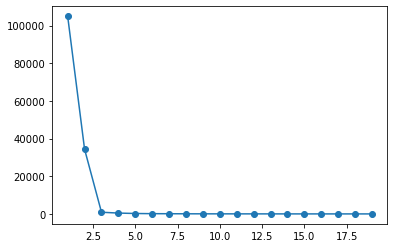

In [210]:
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(scaled_insurance_clusters)
  cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_errors, marker = 'o')

In [211]:
k=3
clusters = KMeans (k, random_state = 42)
clusters.fit(scaled_insurance_clusters)
insurance_clusters['cluster_id'] =clusters.labels_

<ipython-input-211-be1768953ffc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_clusters['cluster_id'] =clusters.labels_


In [212]:
insurance['geographic_cluster'] = insurance_clusters['cluster_id']

In [215]:
insurance['geographic_cluster']= insurance['geographic_cluster'].astype(str)

#### Chi-squared test statistic - to check relationship between categorical features and the outcome feature 

* There is no significant relationship between geographical clusters and Claim reimbursement 

1. Geographical cluster and Claim Reimbursement 

In [221]:
insurance['OUTCOME']= insurance['OUTCOME'].astype(str)

In [222]:
#pip install scipy

In [224]:
insurance_chi = insurance[['OUTCOME', 'geographic_cluster']]
insurance_chi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   OUTCOME             105000 non-null  object
 1   geographic_cluster  105000 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [241]:
contigency_geography= pd.crosstab(insurance_chi['OUTCOME'], insurance_chi['geographic_cluster']) 
contigency_geography

geographic_cluster,0,1,2
OUTCOME,,,
0.0,45306,2020,13296
1.0,33309,1464,9605


In [242]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_geography)

In [243]:
print(p)

0.4912290381049209


2. Age and Claim Reimbursement 

In [246]:
insurance_chi_age = insurance[['OUTCOME', 'AGE']]

contigency_age= pd.crosstab(insurance_chi_age['OUTCOME'], insurance_chi_age['AGE']) 
contigency_age

c, p, dof, expected = chi2_contingency(contigency_age)

print(p)

0.5064039542017416


3. Gender and Claim Reimbursement

In [248]:
insurance_chi_gender = insurance[['OUTCOME', 'GENDER']]

contigency_gender= pd.crosstab(insurance_chi_gender['OUTCOME'], insurance_chi_gender['GENDER']) 
contigency_gender

c, p, dof, expected = chi2_contingency(contigency_gender)

print(p)

0.00015521200208116215


4. Driving Experience and Claim Reimbursement

In [250]:
insurance_chi_dexp = insurance[['OUTCOME', 'DRIVING_EXPERIENCE']]

contigency_dexp= pd.crosstab(insurance_chi_dexp['OUTCOME'], insurance_chi_dexp['DRIVING_EXPERIENCE']) 
contigency_dexp

c, p, dof, expected = chi2_contingency(contigency_dexp)

print(p)

4.6122893240973636e-05


5. Education and Claim Reimbursement

In [251]:
insurance_chi_edu = insurance[['OUTCOME', 'EDUCATION']]

contigency_edu= pd.crosstab(insurance_chi_edu['OUTCOME'], insurance_chi_edu['EDUCATION']) 
contigency_edu

c, p, dof, expected = chi2_contingency(contigency_edu)

print(p)

0.5420761585736916


6. Income and CLaim Reimbursement

In [252]:
insurance_chi_inc = insurance[['OUTCOME', 'INCOME']]

contigency_inc = pd.crosstab(insurance_chi_inc['OUTCOME'], insurance_chi_inc['INCOME']) 
contigency_inc

c, p, dof, expected = chi2_contingency(contigency_inc)

print(p)

0.6070011700509566


7. Vehicle Ownership and Claim Reimbursement

In [256]:
insurance['VEHICLE_OWNERSHIP']= insurance['VEHICLE_OWNERSHIP'].astype(str)

In [257]:
insurance_chi_vown = insurance[['OUTCOME', 'VEHICLE_OWNERSHIP']]

contigency_vown = pd.crosstab(insurance_chi_vown['OUTCOME'], insurance_chi_vown['VEHICLE_OWNERSHIP']) 
contigency_vown

c, p, dof, expected = chi2_contingency(contigency_vown)

print(p)

0.3232895253380093


8. Vehicle Year and Claim Reimbursement

In [259]:
insurance_chi_vyr = insurance[['OUTCOME', 'VEHICLE_YEAR']]

contigency_vyr = pd.crosstab(insurance_chi_vyr['OUTCOME'], insurance_chi_vyr['VEHICLE_YEAR']) 
contigency_vyr

c, p, dof, expected = chi2_contingency(contigency_vyr)

print(p)

0.7861728730620938


9. Marriage and Claim Reimbursement 

In [261]:
insurance['MARRIED'] = insurance['MARRIED'].astype(str)
insurance['CHILDREN'] = insurance['CHILDREN'].astype(str)
insurance['SPEEDING_VIOLATIONS'] = insurance['SPEEDING_VIOLATIONS'].astype(str)
insurance['DUIS'] = insurance['DUIS'].astype(str)
insurance['PAST_ACCIDENTS'] = insurance['PAST_ACCIDENTS'].astype(str)

In [263]:
insurance_chi_married = insurance[['OUTCOME', 'MARRIED']]

contigency_married = pd.crosstab(insurance_chi_married['OUTCOME'], insurance_chi_married['MARRIED']) 
contigency_married

c, p, dof, expected = chi2_contingency(contigency_married)

print(p)

0.051553078148386285


10. Children and Claim Reimburesment

In [264]:
insurance_chi_children = insurance[['OUTCOME', 'CHILDREN']]

contigency_children = pd.crosstab(insurance_chi_children['OUTCOME'], insurance_chi_children['CHILDREN']) 
contigency_children

c, p, dof, expected = chi2_contingency(contigency_children)

print(p)

0.5488558825631149


11. Speeding Violations and Reimbursement

In [265]:
insurance_chi_speed = insurance[['OUTCOME', 'SPEEDING_VIOLATIONS']]

contigency_speed = pd.crosstab(insurance_chi_speed['OUTCOME'], insurance_chi_speed['SPEEDING_VIOLATIONS']) 
contigency_speed

c, p, dof, expected = chi2_contingency(contigency_speed)

print(p)

0.08388952546410892


12. DUIS and Reimbursement 

In [266]:
insurance_chi_duis = insurance[['OUTCOME', 'DUIS']]

contigency_duis = pd.crosstab(insurance_chi_duis['OUTCOME'], insurance_chi_duis['DUIS']) 
contigency_duis

c, p, dof, expected = chi2_contingency(contigency_duis)

print(p)

0.8664833990539164


13. PAST_ACCIDENTS and Reimbursements

In [267]:
insurance_chi_acc = insurance[['OUTCOME', 'PAST_ACCIDENTS']]

contigency_acc = pd.crosstab(insurance_chi_acc['OUTCOME'], insurance_chi_acc['PAST_ACCIDENTS']) 
contigency_acc

c, p, dof, expected = chi2_contingency(contigency_acc)

print(p)

0.4832504116588934


14. TYPE_OF_VEHICLE and Reimbursement 

In [268]:
insurance_chi_vehtype = insurance[['OUTCOME', 'TYPE_OF_VEHICLE']]

contigency_vehtype = pd.crosstab(insurance_chi_vehtype['OUTCOME'], insurance_chi_vehtype['TYPE_OF_VEHICLE']) 
contigency_vehtype

c, p, dof, expected = chi2_contingency(contigency_vehtype)

print(p)

0.008630816447861154


###### *Linear Correlation between numerical features and Claim Reimbursement

In [299]:
insurance_corr = insurance[['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'OUTCOME']]

insurance_corr['OUTCOME'] = insurance_corr['OUTCOME'].astype(float)

insurance_corr.corr()

<ipython-input-299-774fd28335ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_corr['OUTCOME'] = insurance_corr['OUTCOME'].astype(float)


,CREDIT_SCORE,ANNUAL_MILEAGE,OUTCOME
CREDIT_SCORE,1.000000,-0.020313,-0.003068
ANNUAL_MILEAGE,-0.020313,1.000000,-0.001104
OUTCOME,-0.003068,-0.001104,1.000000


#### Encoding categorical features using DictVectorizer 

In [318]:
X = insurance[['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME','VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN','SPEEDING_VIOLATIONS','DUIS', 'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE', 'geographic_cluster', 'CREDIT_SCORE', 'ANNUAL_MILEAGE']]

Y = insurance.OUTCOME

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(84000, 16)
(21000, 16)


In [320]:
dv = DictVectorizer()
categorical  = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME','VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN','SPEEDING_VIOLATIONS','DUIS', 'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE', 'geographic_cluster']

numerical = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']

train_dicts = X_train[categorical + numerical].to_dict(orient='records')
X_train_t = dv.fit_transform(train_dicts)

val_dicts = X_test[categorical + numerical].to_dict(orient='records')
X_val_t = dv.transform(val_dicts)

In [324]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf=RandomForestClassifier()
clf.fit(X_train_t, y_train)

RandomForestClassifier()

In [325]:
preds = clf.predict(X_val_t)

In [330]:
print(clf.score(X_train_t, y_train))


0.9999880952380953


In [331]:
print(clf.score(X_val_t, y_test))

0.5441904761904762
